## 1. Importing Libraries/Data

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv('covid_dataset.csv')

## 2. Data Visulization and Exploration

In [ ]:
#First 5 rows of the data
data.head()

,Date,Country,Confirmed,Recovered,Deaths
0,01-05-2020,India,37257,10007,1223
1,02-05-2020,India,39699,10819,1323
2,03-05-2020,India,42505,11775,1391
3,04-05-2020,India,46437,12847,1566
4,05-05-2020,India,49400,14142,1693


In [ ]:
# Description of data and Null check

print('Null Check\n' + str(data.isnull().sum()))

print("\n\nThe Shape of the data is " +str(data.shape))

print('\n\nThe description of data:  \n')
print(data.info())


Null Check
Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64


The Shape of the data is (150, 5)


The description of data:  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       150 non-null    object
 1   Country    150 non-null    object
 2   Confirmed  150 non-null    int64 
 3   Recovered  150 non-null    int64 
 4   Deaths     150 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.0+ KB
None


This dataset consist of information about the Covid-19 Patients in India. There are no Null values to be found in the dataset. This dataset consist of 150 rows and 5 coloums.

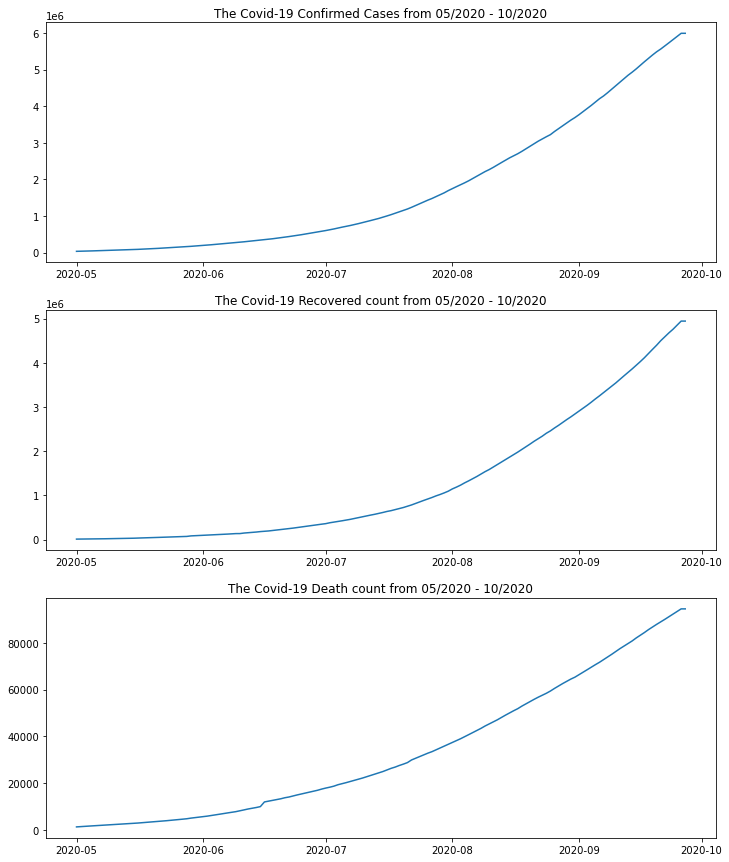

In [ ]:
# Visualization
data['Date'] = pd.to_datetime(data['Date'], format = '%d-%m-%Y')


fig, ax = plt.subplots(3,1, figsize=(12,15))


ax[0].plot(data['Date'], data['Confirmed'])
ax[0].set_title('The Covid-19 Confirmed Cases from 05/2020 - 10/2020')

ax[1].plot(data['Date'], data['Recovered'])
ax[1].set_title('The Covid-19 Recovered count from 05/2020 - 10/2020')

ax[2].plot(data['Date'], data['Deaths'])
ax[2].set_title('The Covid-19 Death count from 05/2020 - 10/2020')

plt.show()

##  ------ Write Description about graph------ ####

## 3. Data Preprocessing and Cleaning

No null values or missing values are found in this dataset. 

No data is considered as outliers as all the values are important for the model to perform regression.


In [ ]:
# We will remove Date and Country as they will not be usefull in model 

data_cleaned = data.drop(['Date', 'Country'], axis=1)
data_cleaned.head()

,Confirmed,Recovered,Deaths
0,37257,10007,1223
1,39699,10819,1323
2,42505,11775,1391
3,46437,12847,1566
4,49400,14142,1693


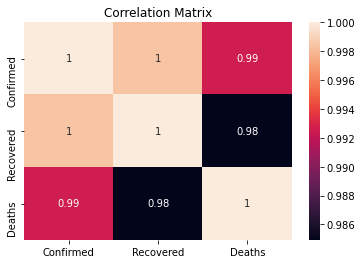

In [ ]:
# Correlation Matrix / Correlation Analysis

correlation = data_cleaned.corr()
sns.heatmap(correlation, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Normalization 

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)


## 4. Data Preparation

In [ ]:
# Defining class X and Class Y
# We will be predicting Death counts for the future so Deaths will be Y

Y = data_scaled[:, 2:3]
X = data_scaled[:, :2]

In [ ]:
# Spliting data into Train/Test sets with 10% testing set

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=0)

print('The Training set size is: ' + str(x_train.shape) + str(y_train.shape))
print('The Testing set size is: ' + str(x_test.shape) + str(y_test.shape))

The Training set size is: (135, 2)(135, 1)
The Testing set size is: (15, 2)(15, 1)


## 5. Model Building

We will be doing Regression for this dataset/problem.

The Three Classic Machine Learnig Models we will be using are:
1. Linear Regression
2. Lasso Regression
3. Ridge Regression

In [ ]:
# function defined to evaluate metrics/loss functions
def evaluate(y_pred, y_test):
    print('Mean Abosulte Error (MAE) is:  ' + str(mae(y_pred, y_test)))
    print('Mean Squared Error (MSE) is: ' + str(mse(y_pred, y_test)))
    print('Root Mean Squared Error (RMSE) is: ' + str(np.sqrt(mse(y_pred, y_test))))
    print('The test accuracy or test R2 Score is: ' + str(r2_score(y_pred, y_test)))

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1 = model1.fit(x_train, y_train)

y_pred = model1.predict(x_test)


In [ ]:
# The training score
print(model1.score(x_train, y_train))

0.9973375764473346


In [ ]:
# evalute the model
evaluate(y_pred, y_test)

Mean Abosulte Error (MAE) is:  0.05713247243077188
Mean Squared Error (MSE) is: 0.004127639993169746
Root Mean Squared Error (RMSE) is: 0.06424671192496738
The test accuracy or test R2 Score is: 0.9926343417285131


### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

model2 = Lasso(random_state=0, alpha=0.25)
model2.fit(x_train, y_train)

y_pred = model2.predict(x_test)

In [ ]:
# The Training accuracy
print(model2.score(x_train, y_train))

0.9287795392398286


In [ ]:
evaluate(y_pred, y_test)

Mean Abosulte Error (MAE) is:  0.16967836053533675
Mean Squared Error (MSE) is: 0.043755070533845884
Root Mean Squared Error (RMSE) is: 0.20917712717657705
The test accuracy or test R2 Score is: 0.8478982552770971


### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

model3 = Ridge(random_state=0)
model3.fit(x_train, y_train)

y_pred = model3.predict(x_test)

In [ ]:
# The Training accuracy
print(model3.score(x_train, y_train))

0.9850151479818373


In [ ]:
evaluate(y_pred, y_test)

Mean Abosulte Error (MAE) is:  0.11061882656992432
Mean Squared Error (MSE) is: 0.013679448757264985
Root Mean Squared Error (RMSE) is: 0.11695917560099757
The test accuracy or test R2 Score is: 0.9721028351699679


## Conclusion/Inference

Linear Regression is seen to be the best model out of the three models with least error and highest r2 value.